In [1]:
# import system libs
import os
import time
import shutil
import pathlib
import itertools
from PIL import Image

# import data handling tools
import zipfile
import cv2
import numpy as np
import pandas as pd
from scipy.ndimage import median_filter
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder ,LabelEncoder

# import Deep learning Libraries

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,InputLayer, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras.utils import to_categorical
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


modules loaded


In [2]:
dataset_path = '/kaggle/input/fer2013/train'


data = []
labels = []
paths = []
# Iterate through the dataset directory
for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        paths.append(img_path)
        img = cv2.imread(img_path) 
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        data.append(img)
        labels.append(class_name)

In [3]:
dataset_path = '/kaggle/input/fer2013/test'

for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        paths.append(img_path)
        img = cv2.imread(img_path) 
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        data.append(img)
        labels.append(class_name)
        
        
df = pd.DataFrame({'data': paths, 'label': labels})
data = np.array(data)
labels = np.array(labels)

In [4]:
df

,data,label
0,/kaggle/input/fer2013/train/surprise/Training_...,surprise
1,/kaggle/input/fer2013/train/surprise/Training_...,surprise
2,/kaggle/input/fer2013/train/surprise/Training_...,surprise
3,/kaggle/input/fer2013/train/surprise/Training_...,surprise
4,/kaggle/input/fer2013/train/surprise/Training_...,surprise
...,...,...
35882,/kaggle/input/fer2013/test/happy/PublicTest_13...,happy
35883,/kaggle/input/fer2013/test/happy/PublicTest_70...,happy
35884,/kaggle/input/fer2013/test/happy/PublicTest_24...,happy
35885,/kaggle/input/fer2013/test/happy/PrivateTest_7...,happy


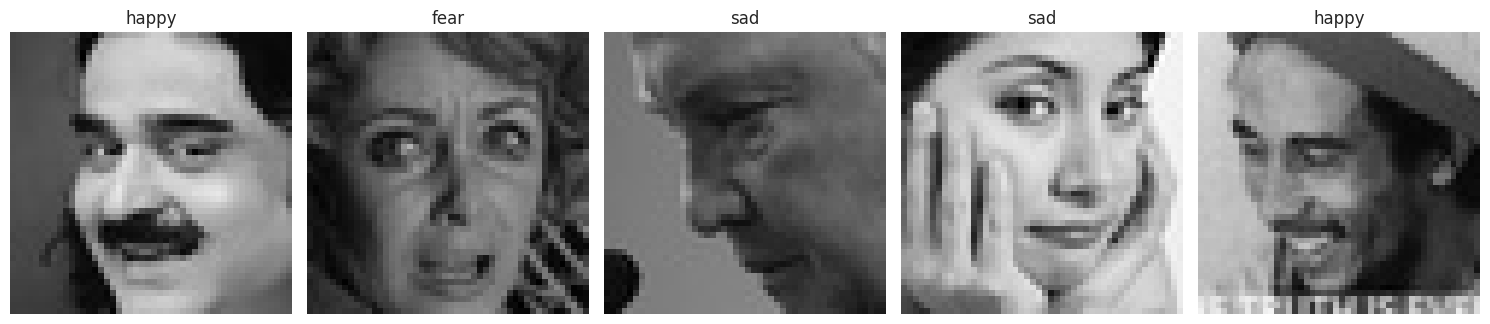

In [5]:
def display_random_images(images, labels, num_images=5):
    num_total_images = len(images)
    random_indices = np.random.choice(num_total_images, size=num_images, replace=False)

    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i, idx in enumerate(random_indices):
        axes[i].imshow(images[idx])
        axes[i].set_title(labels[idx])
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

display_random_images(data, labels)

In [6]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42 , stratify = labels)

In [8]:
y_train = to_categorical(y_train, num_classes=7)  # Convert training labels to one-hot encoded format
y_test = to_categorical(y_test, num_classes=7) 

In [9]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [10]:
print(type(x_train), x_train.shape)
print(type(y_train), y_train.shape)
print(type(x_test), x_test.shape)
print(type(y_test), y_test.shape)

print("x_train data type:", x_train.dtype)
print("y_train data type:", y_train.dtype)
print("x_test data type:", x_test.dtype)
print("y_test data type:", y_test.dtype)

<class 'numpy.ndarray'> (28709, 48, 48, 3)
<class 'numpy.ndarray'> (28709, 7)
<class 'numpy.ndarray'> (7178, 48, 48, 3)
<class 'numpy.ndarray'> (7178, 7)
x_train data type: float64
y_train data type: float32
x_test data type: float64
y_test data type: float32


In [11]:
ann_model = Sequential()

ann_model.add(InputLayer(input_shape=(48, 48, 3)))
ann_model.add(Flatten())

ann_model.add(Dense(64, activation='leaky_relu'))
ann_model.add(BatchNormalization())
ann_model.add(Dropout(0.2))

ann_model.add(Dense(7, activation='softmax'))

ann_model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 6912)              0         
                                                                 
 dense (Dense)               (None, 64)                442432    
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 455       
                                                                 
Total params: 443143 (1.69 MB)
Trainable params: 443015 (1.69 MB)
Non-trainable params: 128 (512.00 Byte)
________________

In [12]:
history_ann = ann_model.fit(x_train,y_train,validation_data = (x_test, y_test),epochs = 40 )

Epoch 1/40
898/898 [==============================] - 8s 5ms/step - loss: 1.8173 - accuracy: 0.3081 - val_loss: 1.6857 - val_accuracy: 0.3392
Epoch 2/40
898/898 [==============================] - 4s 4ms/step - loss: 1.6785 - accuracy: 0.3448 - val_loss: 1.6665 - val_accuracy: 0.3363
Epoch 3/40
898/898 [==============================] - 4s 4ms/step - loss: 1.6439 - accuracy: 0.3607 - val_loss: 1.6932 - val_accuracy: 0.3310
Epoch 4/40
898/898 [==============================] - 4s 4ms/step - loss: 1.6302 - accuracy: 0.3680 - val_loss: 1.6471 - val_accuracy: 0.3605
Epoch 5/40
898/898 [==============================] - 4s 4ms/step - loss: 1.6207 - accuracy: 0.3711 - val_loss: 1.7855 - val_accuracy: 0.3013
Epoch 6/40
898/898 [==============================] - 4s 4ms/step - loss: 1.6109 - accuracy: 0.3746 - val_loss: 1.6911 - val_accuracy: 0.3409
Epoch 7/40
898/898 [==============================] - 4s 4ms/step - loss: 1.6082 - accuracy: 0.3781 - val_loss: 1.6410 - val_accuracy: 0.3565
Epoch 

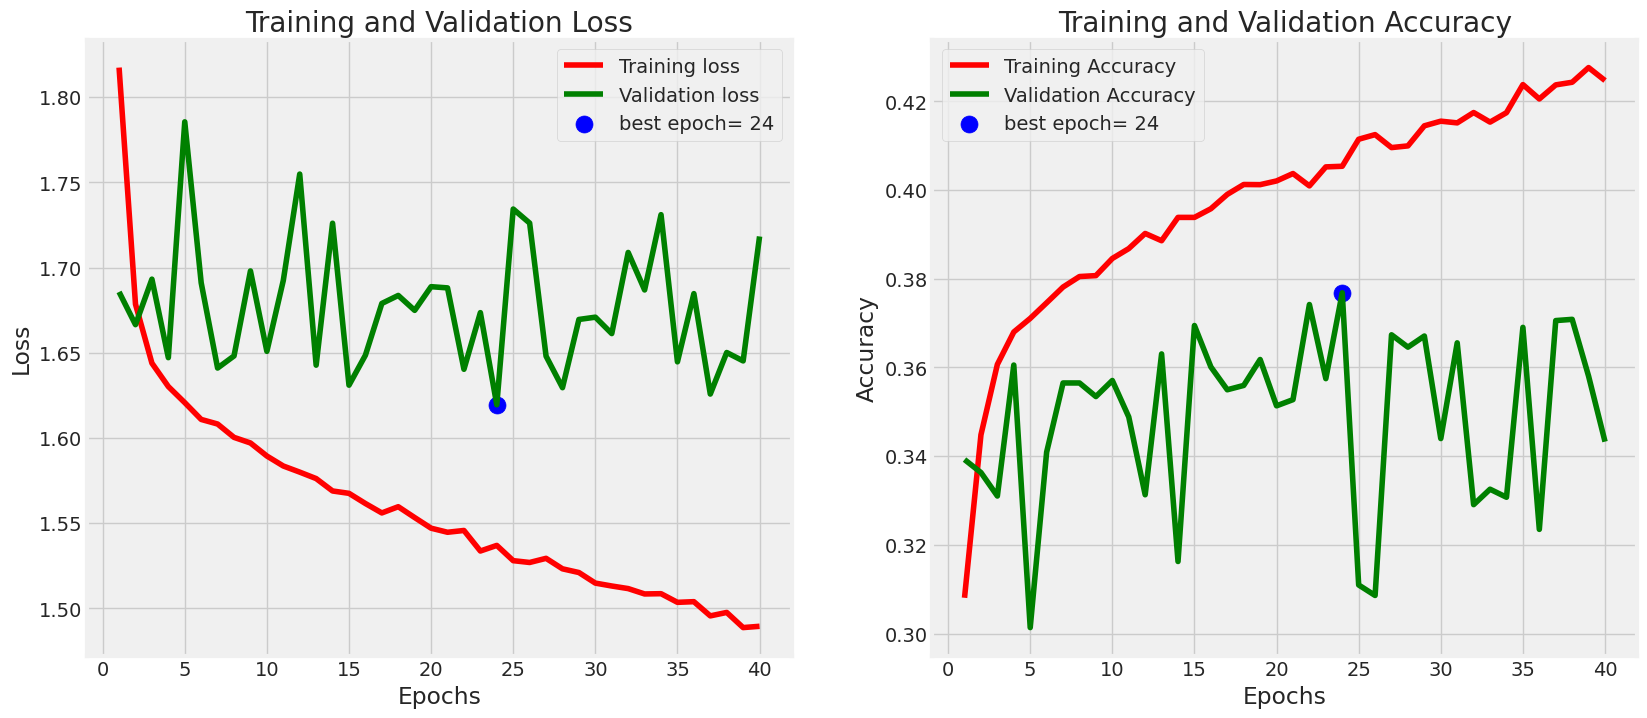

In [13]:
# Define needed variables
tr_acc = history_ann.history['accuracy']
tr_loss = history_ann.history['loss']
val_acc = history_ann.history['val_accuracy']
val_loss = history_ann.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [14]:
def conf_matrix(y_test, y_pred):
    y_predicted_labels = [np.argmax(i) for i in y_pred]
    y_predicted_labels = np.array(y_predicted_labels)
    y_test = np.argmax(y_test, axis=1)
    cm = confusion_matrix(y_test, y_predicted_labels)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d');

225/225 [==============================] - 0s 2ms/step


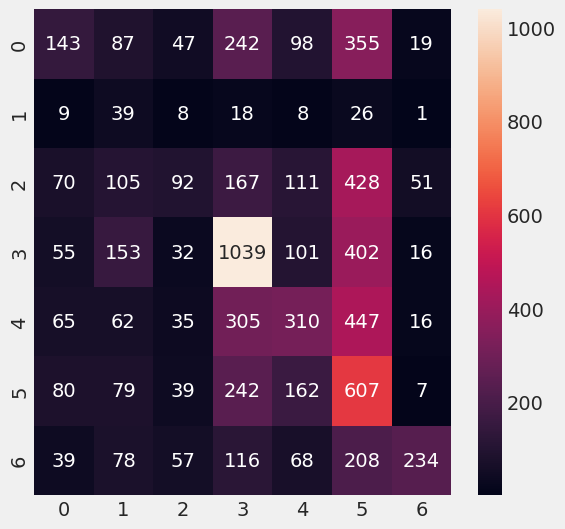

In [15]:
y_pred_ann = ann_model.predict(x_test)
conf_matrix(y_test, y_pred_ann)

In [58]:
model.save('ann_model_optimal.h5')

# Data Augmantation

In [7]:
strat = df['label']
train_df,validate_df = train_test_split(df,train_size = 0.80,shuffle = True, random_state = 42, stratify = strat)

In [8]:
batch_size = 64
img_size = (48,48)
channels = 3
img_shape = (img_size[0],img_size[1],channels)

# Create different ImageDataGenerator objects for training and testing/validation sets
train_gen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range = 0.1,   
    height_shift_range = 0.1,
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True)
valid_gen = ImageDataGenerator(rescale=1./255)


# Specify the directory argument for each set
train_gen = train_gen.flow_from_dataframe(dataframe = train_df, x_col = 'data' ,y_col = 'label', target_size = img_size, class_mode = 'categorical',color_mode = 'grayscale'
                                      , shuffle = True, batch_size = batch_size)
validate_gen = valid_gen.flow_from_dataframe(dataframe = validate_df,x_col = 'data' ,y_col = 'label', target_size = img_size, class_mode = 'categorical',color_mode = 'grayscale',
                                          shuffle = True, batch_size = batch_size)

Found 28709 validated image filenames belonging to 7 classes.
Found 7178 validated image filenames belonging to 7 classes.


# CNN

In [9]:
model = Sequential([
    Conv2D(64,(3,3),activation = 'relu', input_shape = (48,48,1)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.30,seed = 42),
    
    Conv2D(128,(3,3),activation = 'relu'),
    Conv2D(128,(3,3),activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.30,seed = 42),
    
    Conv2D(256,(3,3),activation = 'relu'),
    Conv2D(256,(3,3),activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.30,seed = 42),
    
    Dense(512,activation = 'relu'),
    Dropout(rate =0.35,seed = 42),
    Flatten(),
    Dense(7,activation = 'softmax')
])

model.compile(optimizer = "adam" , loss = "categorical_crossentropy" , metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 46, 46, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 23, 23, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 19, 19, 128)       1

In [10]:
history = model.fit(x= train_gen, epochs = 50 , verbose = 1,validation_data = validate_gen,shuffle = True)

Epoch 1/50


2023-12-14 15:25:47.617410: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


449/449 [==============================] - 53s 96ms/step - loss: 1.9354 - accuracy: 0.2284 - val_loss: 1.8428 - val_accuracy: 0.1754
Epoch 2/50
449/449 [==============================] - 42s 93ms/step - loss: 1.7359 - accuracy: 0.2984 - val_loss: 1.7021 - val_accuracy: 0.3101
Epoch 3/50
449/449 [==============================] - 42s 94ms/step - loss: 1.6327 - accuracy: 0.3526 - val_loss: 1.7134 - val_accuracy: 0.3030
Epoch 4/50
449/449 [==============================] - 43s 95ms/step - loss: 1.5647 - accuracy: 0.3860 - val_loss: 1.5938 - val_accuracy: 0.3833
Epoch 5/50
449/449 [==============================] - 44s 98ms/step - loss: 1.5251 - accuracy: 0.4068 - val_loss: 1.4470 - val_accuracy: 0.4330
Epoch 6/50
449/449 [==============================] - 44s 97ms/step - loss: 1.4866 - accuracy: 0.4259 - val_loss: 1.4681 - val_accuracy: 0.4340
Epoch 7/50
449/449 [==============================] - 42s 93ms/step - loss: 1.4609 - accuracy: 0.4380 - val_loss: 1.4803 - val_accuracy: 0.4207
Epo

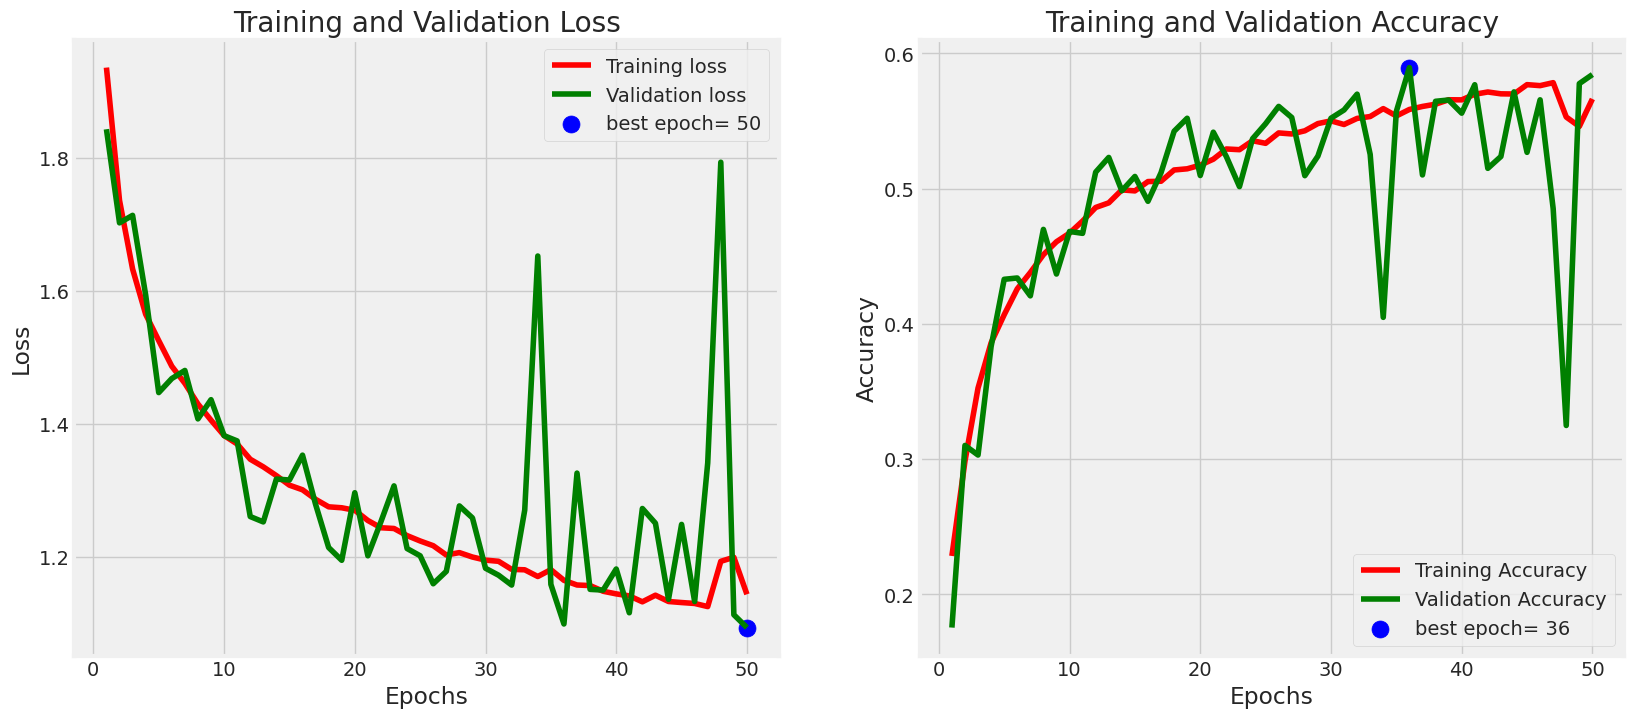

In [11]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [54]:
list(train_gen.class_indices.keys())

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

113/113 [==============================] - 7s 59ms/step


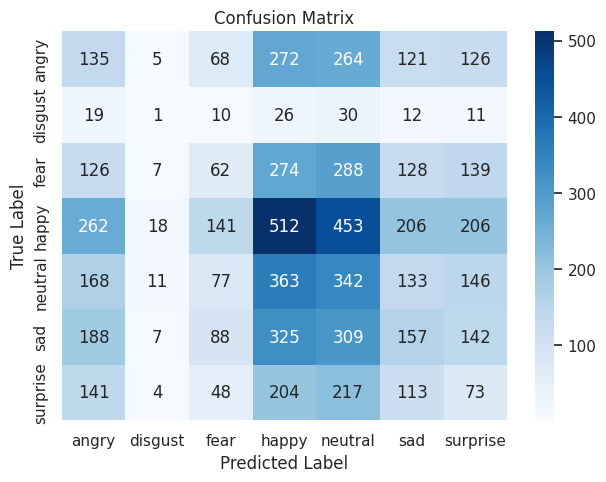

In [12]:

# Get the true labels and predicted labels for the validation set
validation_labels = validate_gen.classes
validation_pred_probs = model.predict(validate_gen)
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(validation_labels, validation_pred_labels)
class_names = list(train_gen.class_indices.keys())
sns.set()
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [13]:
model.save('model_optimal.h5')